In [ ]:
#Importing the libraries and load the data
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/netflix_titles.csv.zip')
df.head(5)



,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
#Clean the data
df=df.drop_duplicates()
df = df.dropna(subset=['title','type', 'rating', 'duration', 'release_year'])

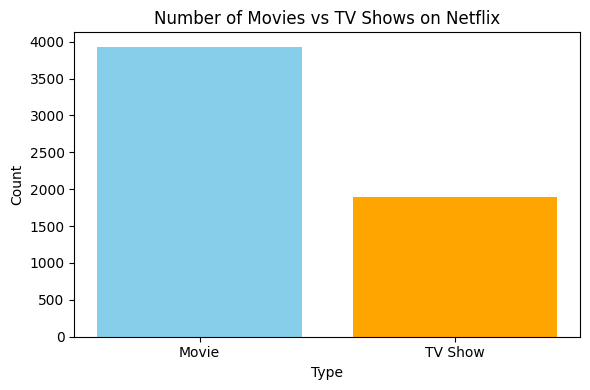

In [ ]:
# Bar Chart: Movies vs TV Shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()



We can see that there are more of movies on netflix then tv shows.

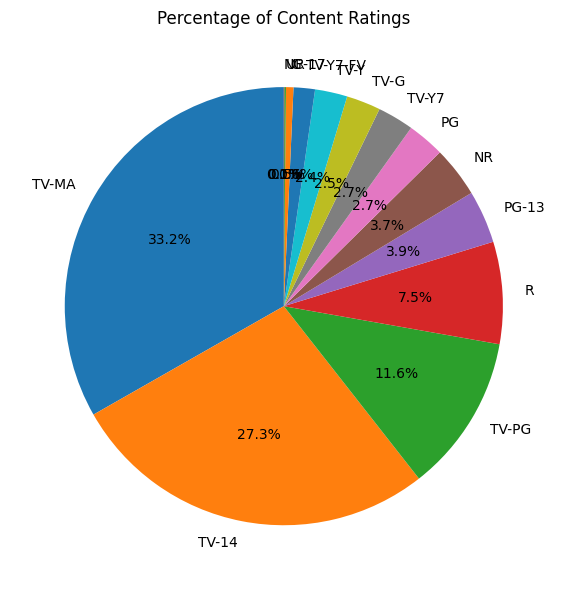

In [ ]:
#Pie Chart: Content Rating Distribution
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts.values,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()


We can most prominently observe here that there are most content is of TV-MA rating followed by TV-14.

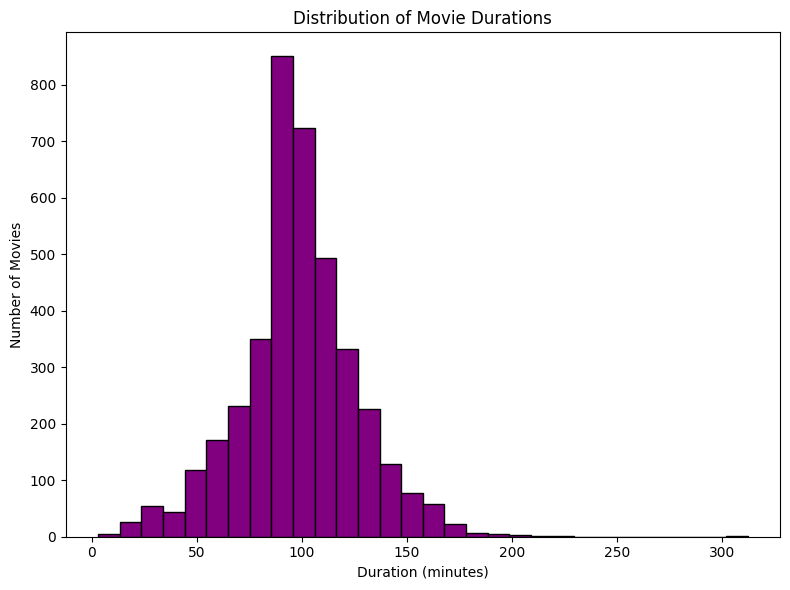

In [ ]:
#Histogram: Movie Duration Distribution

movie_durations = df[df['type']=='Movie']['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_durations, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()



We can see the average movie duration is around 700-800 min.


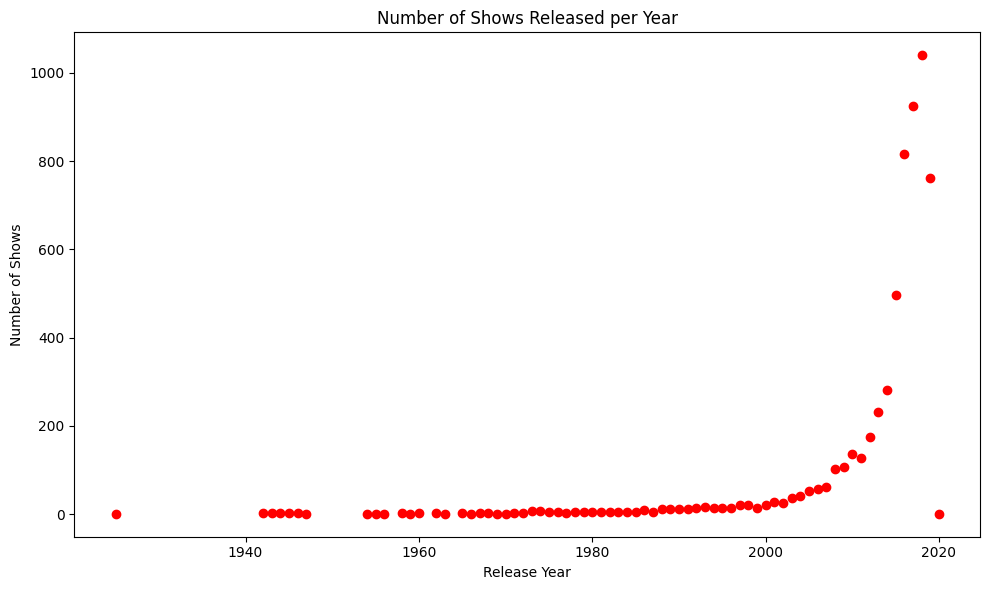

In [ ]:
#Scatter Plot: Release Year vs Number of Shows

release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_year_counts.index, release_year_counts.values, color='red')
plt.title('Number of Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()


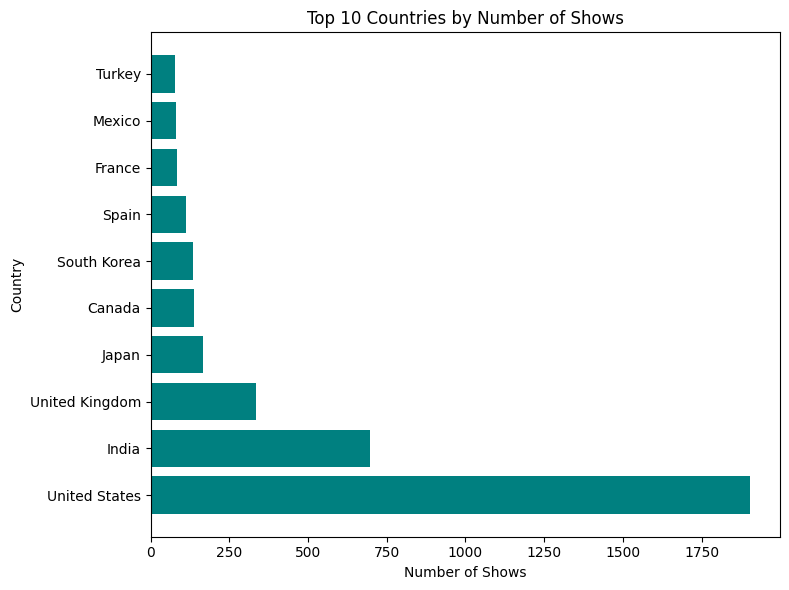

In [ ]:
#Horizontal Bar Chart: Top 10 Countries by Number of Shows

top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(top_countries.index, top_countries.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_countries_bar.png')
plt.show()

As observed, US is at no.1 and India is at no.2 in the content.

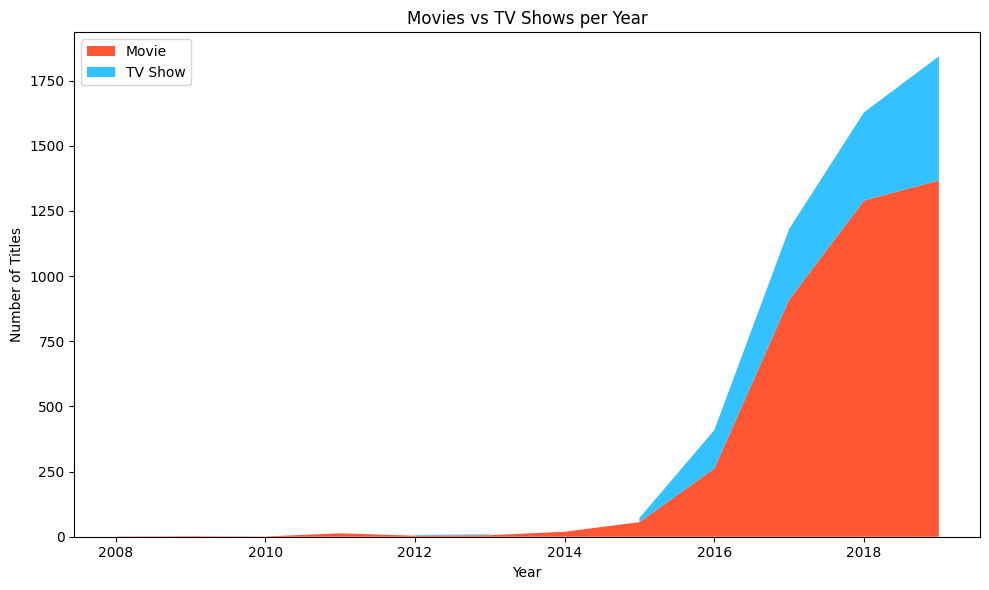

In [ ]:
# Stack Plot: Movies vs TV Shows per year
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year
year_type_counts=df.groupby(['year_added','type']).size().unstack()
plt.figure(figsize=(10,6))
plt.stackplot(year_type_counts.index,year_type_counts['Movie'],year_type_counts['TV Show'],labels=['Movie','TV Show'], colors=['#FF5733','#33C1FF'])
plt.title('Movies vs TV Shows per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('movies_vs_tvshows_per_year.png')
plt.show()


We can observe that both Movies and TV Shows took a boom after the year 2015 but here also TV Shows hae prominent boost over movies.


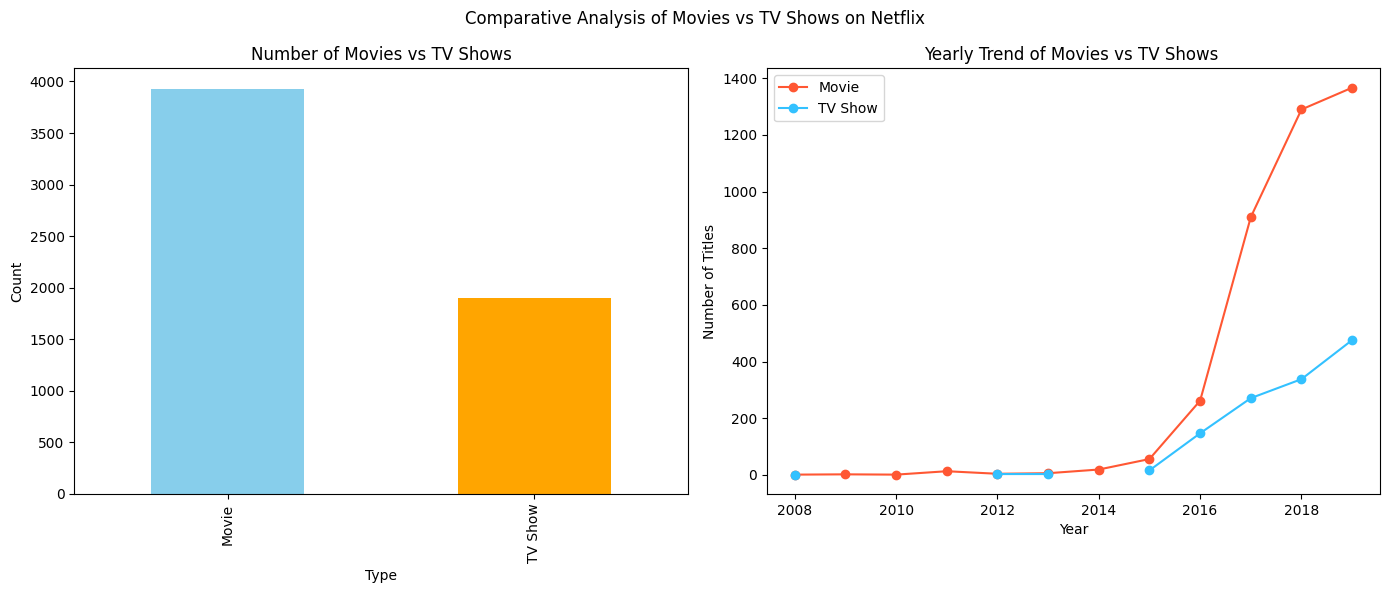

In [ ]:
#Subplot: Comparison Moives vs TV Shows
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year
year_type_counts=df.groupby(['year_added','type']).size().unstack()
#create subplot
fig, axs=plt.subplots(1,2,figsize=(14,6))
plt.suptitle("Comparative Analysis of Movies vs TV Shows on Netflix")
#Bar plot
df['type'].value_counts().plot(kind='bar',ax=axs[0],color=['skyblue','orange'])
axs[0].set_title('Number of Movies vs TV Shows')
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Count')

#Line plot
axs[1].plot(year_type_counts.index,year_type_counts['Movie'],marker='o',linestyle='-',label='Movie',color='#FF5733')
axs[1].plot(year_type_counts.index,year_type_counts['TV Show'],marker='o',linestyle='-',label='TV Show',color='#33C1FF')
axs[1].set_title('Yearly Trend of Movies vs TV Shows ')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Titles')
axs[1].legend()
plt.tight_layout()
plt.savefig('comparison_movies_tvshows.png')
plt.show()

As we can clearly see that Movies show a boom after 2015 in comparison to the TV Shows

## **Seaborn**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/netflix_titles.csv.zip')
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


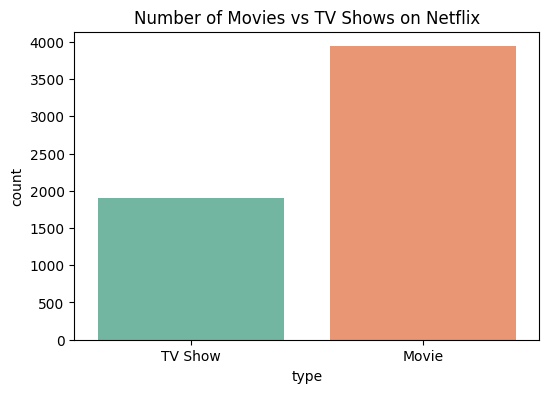

In [ ]:
#1.Countplot: Movies vs TV Shows
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='type',palette='Set2')
plt.title('Number of Movies vs TV Shows on Netflix')


plt.show()

As we can clearly see from the above plot that, number of

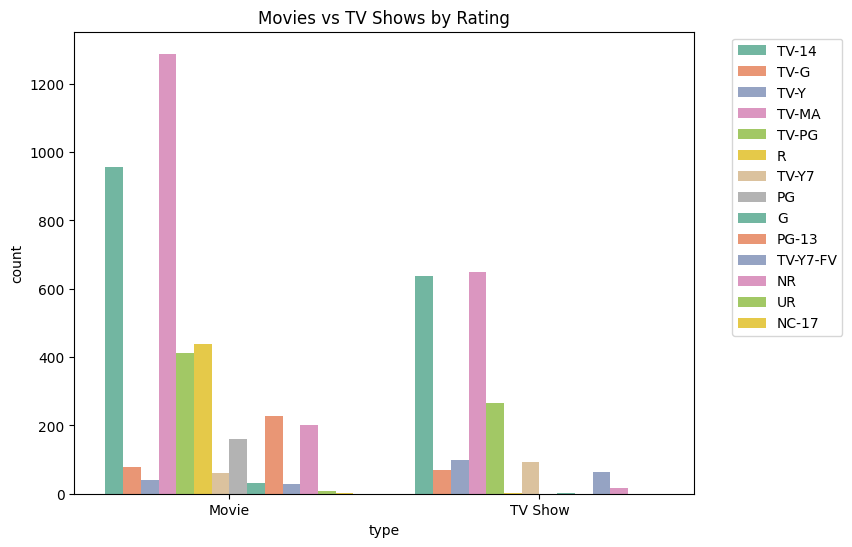

In [ ]:
#2. Countplot with Hue (Ratings)
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='type',hue='rating',palette='Set2',order=df['type'].value_counts().index)
plt.title('Movies vs TV Shows by Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Most common rating for Movies is 'TV-MA' and 'TV-14', sames goes for TV Shows as well.

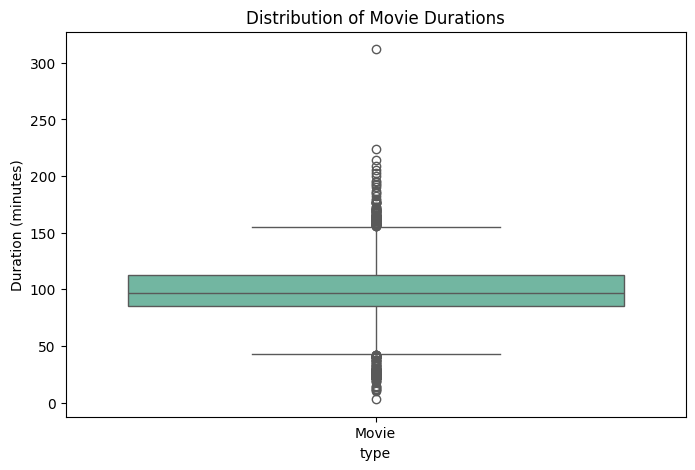

In [ ]:
#3.Boxplot: Movie Duration Distribution
movies=df[df['type']=='Movie'].dropna(subset=['duration'])
movies['duration']=movies['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,5))
sns.boxplot(x='type',y='duration',data=movies,palette='Set2')
plt.ylabel('Duration (minutes)')
plt.title('Distribution of Movie Durations')
plt.show()

The observation from above boxplot is that Average duration  ~ 100 min.

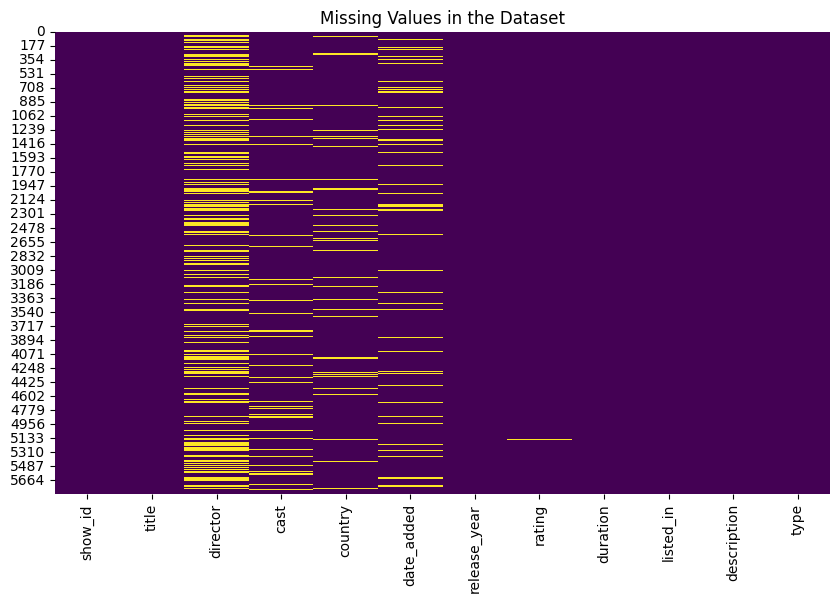

In [ ]:
#4.Heatmap: Missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

We can clearly see that the fields director,cast,country, date_added and rating has the missing values. Also in them director has the most number of missing values and ratin has the least missing values.

Text(0.5, 0, 'Country')

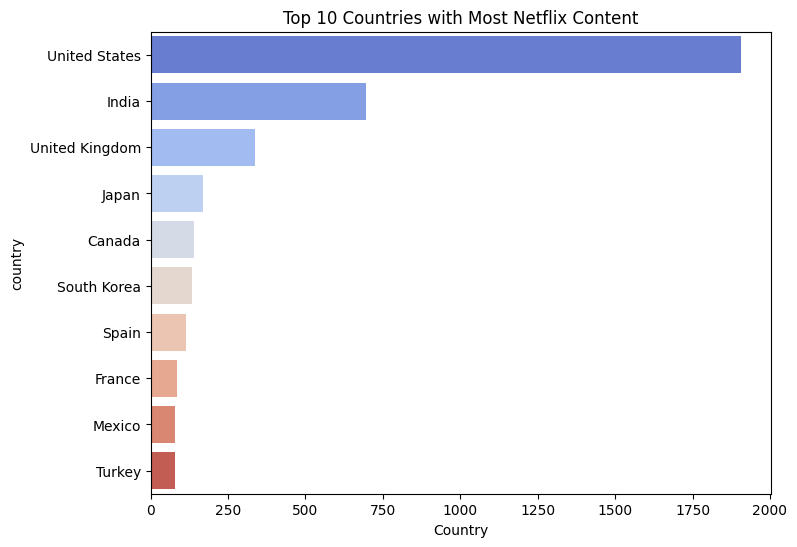

In [ ]:
#5. Barplot: Top 10 Countries by Content
top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.values,y=top_countries.index,palette='coolwarm')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')

We can clearly see that us is at the top with most of the content. And we can also observe that India is top three, with the second most content on netflix

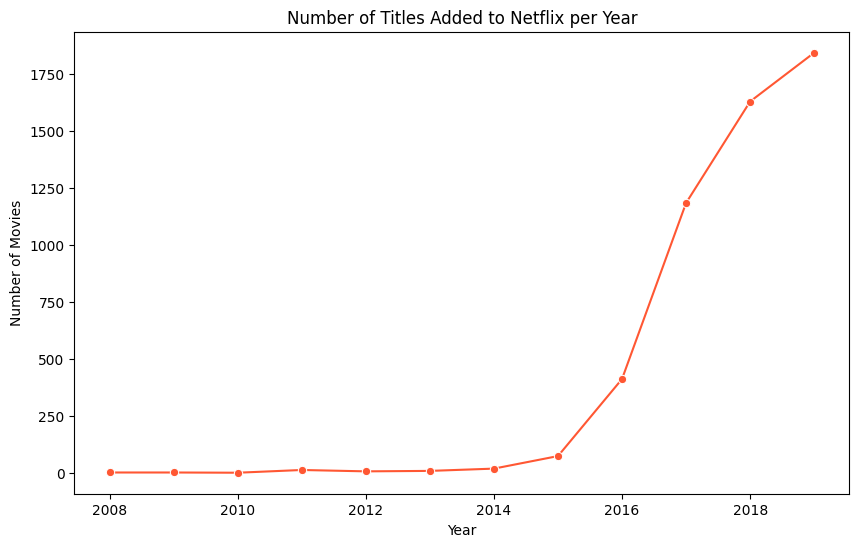

In [ ]:
#6. Lineplot: Number of Movies Released per Year
df['year_added']=pd.to_datetime(df['date_added']).dt.year
yearly=df.groupby('year_added').size()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly.index,y=yearly.values,marker='o',color='#FF5733')
plt.title('Number of Titles Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Here, we can clearly see that number of movies added took a boom after the year 2015.